# Look at data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
full_data = [train, test]

print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## 1. MSSubClass

In [2]:
df = train[['MSSubClass', 'SalePrice']].groupby(['MSSubClass'], as_index=False).mean()
print(df.sort_values(by=['SalePrice']))

    MSSubClass      SalePrice
1           30   95829.724638
13         180  102300.000000
3           45  108591.666667
14         190  129613.333333
10          90  133541.076923
12         160  138647.380952
4           50  143302.972222
9           85  147810.000000
2           40  156125.000000
6           70  166772.416667
8           80  169736.551724
0           20  185224.811567
7           75  192437.500000
11         120  200779.080460
5           60  239948.501672


In [3]:
mp = {30:1, 180:2, 45:3, 190:4, 90:5, 160:6, 50:7, 85:8, 40:9, 70:10, 80:11, 20:12, 75:13, 120:14, 60:15, 150:14}
#for dataset in full_data:
train['MSSubClass'] = train['MSSubClass'].map(mp).astype(int)
test['MSSubClass'] = test['MSSubClass'].map(mp).astype(int)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,15,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,12,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,15,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,10,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,15,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 2. MSZoning

In [4]:
df = train[['MSZoning', 'SalePrice']].groupby(['MSZoning'], as_index=False).mean()
print(train['MSZoning'].value_counts())
print(df.sort_values(by=['SalePrice']))

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
  MSZoning      SalePrice
0  C (all)   74528.000000
4       RM  126316.830275
2       RH  131558.375000
3       RL  191004.994787
1       FV  214014.061538


In [5]:
test['MSZoning'] = test['MSZoning'].fillna('RL')
mp = {'C (all)':1, 'RM':2, 'RH':3, 'RL':4, 'FV':5}
for dataset in full_data:
    dataset['MSZoning'] = dataset['MSZoning'].map(mp).astype(int)

## 3. LotFrontage

/Users/bai/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


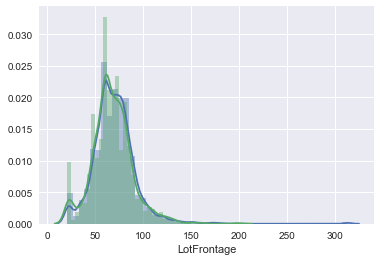

In [6]:
for dataset in full_data:
    ave = dataset['LotFrontage'].median()
    std = dataset['LotFrontage'].std()
    null_count = dataset['LotFrontage'].isnull().sum()
    null_list = np.random.randint(ave-std, ave+std, size=null_count)
    dataset['LotFrontage'][np.isnan(dataset['LotFrontage'])] = null_list
    dataset['LotFrontage'] = dataset['LotFrontage'].astype(float)
sns.distplot(train['LotFrontage'])
sns.distplot(test['LotFrontage'])

## 4. LotArea

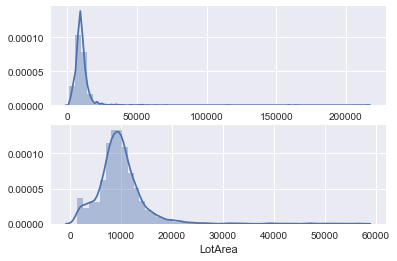

In [7]:
plt.subplot(2,1,1)
sns.distplot(train['LotArea'])
plt.subplot(2,1,2)
sns.distplot(test['LotArea'])

## 5. Street

In [8]:
print(train['Street'].value_counts())
print(test['Street'].value_counts())
print(train[['Street','SalePrice']].groupby(['Street'], as_index=False).mean())

Pave    1454
Grvl       6
Name: Street, dtype: int64
Pave    1453
Grvl       6
Name: Street, dtype: int64
  Street      SalePrice
0   Grvl  130190.500000
1   Pave  181130.538514


In [9]:
#for dataset in full_data:
train = pd.get_dummies(train, columns=['Street'])
test = pd.get_dummies(test, columns=['Street'])

## 6. Alley

In [10]:
train = pd.get_dummies(train, columns=['Alley'], dummy_na=True)
test = pd.get_dummies(test, columns=['Alley'], dummy_na=True)

## 7. LotShape

In [11]:
print(train[['LotShape','SalePrice']].groupby(['LotShape'], as_index=False).mean())

  LotShape      SalePrice
0      IR1  206101.665289
1      IR2  239833.365854
2      IR3  216036.500000
3      Reg  164754.818378


In [13]:
mp = {'Reg':0, 'IR1':1, 'IR2':2, 'IR3':3}
for dataset in full_data:
    dataset['LotShape'] = dataset['LotShape'].map(mp).astype(int)

## 8. LandContour

In [14]:
print(train[['LandContour','SalePrice']].groupby(['LandContour'], as_index=False).mean())

  LandContour      SalePrice
0         Bnk  143104.079365
1         HLS  231533.940000
2         Low  203661.111111
3         Lvl  180183.746758


In [15]:
train = pd.get_dummies(train, columns=['LandContour'])
test = pd.get_dummies(test, columns=['LandContour'])

## 9. Utilities

In [17]:
print(test['Utilities'].value_counts())
print(train['Utilities'].value_counts())

AllPub    1457
Name: Utilities, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


In [18]:
for dataset in full_data:
    dataset.drop(['Utilities'], axis=1)

## 10. LotConfig

In [21]:
print(train[['LotConfig','SalePrice']].groupby(['LotConfig'], as_index=False).mean())
print(test['LotConfig'].value_counts())
print(train['LotConfig'].value_counts())

  LotConfig      SalePrice
0    Corner  181623.425856
1   CulDSac  223854.617021
2       FR2  177934.574468
3       FR3  208475.000000
4    Inside  176938.047529
Inside     1081
Corner      248
CulDSac      82
FR2          38
FR3          10
Name: LotConfig, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


In [22]:
train = pd.get_dummies(train, columns=['LotConfig'])
test = pd.get_dummies(test, columns=['LotConfig'])

## 11. LandSlope

In [24]:
print(train['LandSlope'].value_counts())
print(test['LandSlope'].value_counts())

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
Gtl    1396
Mod      60
Sev       3
Name: LandSlope, dtype: int64


In [25]:
mp = {'Gtl':1, 'Mod':2, 'Sev':3}
for dataset in full_data:
    dataset['LandSlope'] = dataset['LandSlope'].map(mp).astype(int)

## 12. Neighborhood

In [26]:
print(train['Neighborhood'].value_counts())
print(test['Neighborhood'].value_counts())

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
NAmes      218
OldTown    126
CollgCr    117
Somerst     96
Edwards     94
NridgHt     89
Gilbert     86
Sawyer      77
SawyerW     66
Mitchel     65
NWAmes      58
IDOTRR      56
Crawfor     52
BrkSide     50
Timber      34
NoRidge     30
StoneBr     26
SWISU       23
MeadowV     20
ClearCr     16
NPkVill     14
BrDale      14
Veenker     13
Blmngtn     11
Blueste      8
Name: Neighborhood, dtype: int64


In [27]:
train = pd.get_dummies(train, columns=['Neighborhood'])
test = pd.get_dummies(test, columns=['Neighborhood'])

## 13. Condition1 & 2

In [28]:
print(train['Condition1'].value_counts())
print(test['Condition1'].value_counts())

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64
Norm      1251
Feedr       83
Artery      44
RRAn        24
PosN        20
RRAe        17
PosA        12
RRNn         4
RRNe         4
Name: Condition1, dtype: int64


In [29]:
train = pd.get_dummies(train, columns=['Condition1'])
test = pd.get_dummies(test, columns=['Condition1'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 123 entries, Id to Condition1_RRNn
dtypes: float64(3), int64(36), object(36), uint8(48)
memory usage: 924.0+ KB
None


In [30]:
print(train.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'Utilities', 'LandSlope', 'Condition2', 'BldgType',
       ...
       'Neighborhood_Veenker', 'Condition1_Artery', 'Condition1_Feedr',
       'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN',
       'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe',
       'Condition1_RRNn'],
      dtype='object', length=123)


In [31]:
for dataset in full_data:
    dataset.loc[dataset['Condition2'] == 'Artery', 'Condition1_Artery'] = 1
    dataset.loc[dataset['Condition2'] == 'Feedr', 'Condition1_Feedr'] = 1
    dataset.loc[dataset['Condition2'] == 'Norm', 'Condition1_Norm'] = 1
    dataset.loc[dataset['Condition2'] == 'PosA', 'Condition1_PosA'] = 1
    dataset.loc[dataset['Condition2'] == 'PosN', 'Condition1_PosN'] = 1
    dataset.loc[dataset['Condition2'] == 'RRAe', 'Condition1_RRAe'] = 1
    dataset.loc[dataset['Condition2'] == 'RRAn', 'Condition1_RRAn'] = 1
    dataset.loc[dataset['Condition2'] == 'RRNe', 'Condition1_RRNe'] = 1
    dataset.loc[dataset['Condition2'] == 'RRNn', 'Condition1_RRNn'] = 1
    dataset.drop(['Condition2'], axis=1)

## 14. BldgType

In [32]:
train = pd.get_dummies(train, columns=['BldgType'])
test = pd.get_dummies(test, columns=['BldgType'])

## 15. HouseStyle

In [33]:
train = pd.get_dummies(train, columns=['HouseStyle'])
test = pd.get_dummies(test, columns=['HouseStyle'])

## 16. Overall Quality and Condition

Nothing to do

## 17. YearBuilt & YearRemodAdd

In [34]:
print(train['YearBuilt'].min())
print(test['YearBuilt'].min())

1872
1879


In [35]:
mn = train['YearBuilt'].min()
for dataset in full_data:
    dataset['YearBuilt'].apply(lambda x: x - mn)

In [36]:
for dataset in full_data:
    dataset['YearRemodAdd'].apply(lambda x: x - mn)